# Housing prices in Amsterdam ML coursework

 #### This is the jupyter notebook file for a machine learning project that aims to produce a series of models decribing current and future trends on the housing market in Amsterdam. As this is a city which I would personally very much like to live in, it seems appropriate that I use this opportunity to complete the coursework and simultaneously identify the best areas to live in in the future.

#### The housing market, wherever it may be is an interesting field to investigate for me due to its flexibility and variation depending on different areas of a city that we look into. I chose this dataset specifically because of my interest in the city of Amsterdam and because, included in the dataset are lattitude and longitude values, meaning that there are opportunities to build a model that may assess trends by location.

### Objectives:

#### - Create a predictive model to estimate future housing price trends
#### - Identify locations where trends exist in the housing market

# --------------------------------------------------------------------------------------------------

# Importing the relevant python libraries for use throughout the script

In [1]:
import numpy as np
import sklearn
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns # For experimentation

# Import the Scikit-Learn Framework NB: ≥0.20 is required
import sklearn
from sklearn.linear_model import LinearRegression
from sklearn import linear_model
assert sklearn.__version__ >= "0.20", 'You need version 0.2 or greater of Scikit-learn'

## Import the data file. It is in the Jupyter notebook file, therefore the full filepath is not required

In [2]:
df = pd.read_csv(r'HousingPrices-Amsterdam-August-2021.csv', thousands = ",") # read the csv file

In [3]:
df.describe()

,Unnamed: 0,Price,Area,Room,Lon,Lat
count,924.000000,9.200000e+02,924.000000,924.000000,924.000000,924.000000
mean,462.500000,6.220654e+05,95.952381,3.571429,4.888605,52.363326
std,266.880123,5.389942e+05,57.447436,1.592332,0.053140,0.024028
min,1.000000,1.750000e+05,21.000000,1.000000,4.644819,52.291519
25%,231.750000,3.500000e+05,60.750000,3.000000,4.855834,52.352077
50%,462.500000,4.670000e+05,83.000000,3.000000,4.886818,52.364631
75%,693.250000,7.000000e+05,113.000000,4.000000,4.922337,52.377598
max,924.000000,5.950000e+06,623.000000,14.000000,5.029122,52.423805


# Data wrangling, cleaning and preparation

#### The process to go through shall include removing and null and duplicated values. Assessing the dataset to check if it is appropriate to rename any of the columns and correctly indexing and splicing the dataset before analysing the optimum train/test split.

## The next section will check for any null values, find how many and in which column of the dataset they are in and then remove them

In [4]:
df.isnull().values.any()

True

In [5]:
df.isna().sum()

Unnamed: 0    0
Address       0
Zip           0
Price         4
Area          0
Room          0
Lon           0
Lat           0
dtype: int64

In [6]:
df = df.dropna()
df.isna().sum()

Unnamed: 0    0
Address       0
Zip           0
Price         0
Area          0
Room          0
Lon           0
Lat           0
dtype: int64

In [7]:
## Remove any duplicate values from the dataset
df = df.drop_duplicates()

In [8]:
# Removes the text part of the Zip Code, but this is okay as we do not want the individual codes but the general areas for grouping
df['Zip'] = df['Zip'].str.split(' ',1).str[0].astype(np.int32)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 920 entries, 0 to 923
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  920 non-null    int64  
 1   Address     920 non-null    object 
 2   Zip         920 non-null    int32  
 3   Price       920 non-null    float64
 4   Area        920 non-null    int64  
 5   Room        920 non-null    int64  
 6   Lon         920 non-null    float64
 7   Lat         920 non-null    float64
dtypes: float64(3), int32(1), int64(3), object(1)
memory usage: 61.1+ KB


## Set the Seaborn theme and plot the raw data

In [9]:
sns.set_theme(style = "dark")
sns.set_context("notebook")

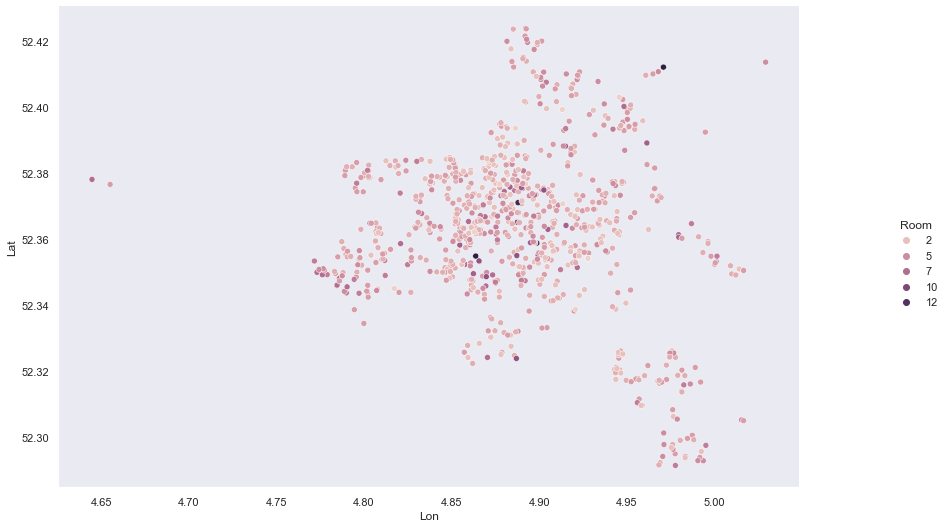

In [10]:
# Plot that visualises the coordinates of each of the properties in the database

sns.relplot(x = "Lon", y = "Lat", hue = "Room", data = df)
plt.gcf().set_size_inches(15, 8)
plt.show()

In [11]:
df.drop(["Unnamed: 0", "Address"], axis=1)

,Zip,Price,Area,Room,Lon,Lat
0,1091,685000.0,64,3,4.907736,52.356157
1,1059,475000.0,60,3,4.850476,52.348586
2,1097,850000.0,109,4,4.944774,52.343782
3,1060,580000.0,128,6,4.789928,52.343712
4,1036,720000.0,138,5,4.902503,52.410538
...,...,...,...,...,...,...
919,1097,750000.0,117,1,4.927757,52.354173
920,1033,350000.0,72,3,4.890612,52.414587
921,1058,350000.0,51,3,4.856935,52.363256
922,1095,599000.0,113,4,4.965731,52.375268


In [12]:
df["Price_per_m2"] = (df["Price"] / df["Area"])
df

,Unnamed: 0,Address,Zip,Price,Area,Room,Lon,Lat,Price_per_m2
0,1,"Blasiusstraat 8 2, Amsterdam",1091,685000.0,64,3,4.907736,52.356157,10703.125000
1,2,"Kromme Leimuidenstraat 13 H, Amsterdam",1059,475000.0,60,3,4.850476,52.348586,7916.666667
2,3,"Zaaiersweg 11 A, Amsterdam",1097,850000.0,109,4,4.944774,52.343782,7798.165138
3,4,"Tenerifestraat 40, Amsterdam",1060,580000.0,128,6,4.789928,52.343712,4531.250000
4,5,"Winterjanpad 21, Amsterdam",1036,720000.0,138,5,4.902503,52.410538,5217.391304
...,...,...,...,...,...,...,...,...,...
919,920,"Ringdijk, Amsterdam",1097,750000.0,117,1,4.927757,52.354173,6410.256410
920,921,"Kleine Beerstraat 31, Amsterdam",1033,350000.0,72,3,4.890612,52.414587,4861.111111
921,922,"Stuyvesantstraat 33 II, Amsterdam",1058,350000.0,51,3,4.856935,52.363256,6862.745098
922,923,"John Blankensteinstraat 51, Amsterdam",1095,599000.0,113,4,4.965731,52.375268,5300.884956


In [13]:
grouped_zip_codes = df.groupby(['Zip']).mean()['Price_per_m2']

Text(0, 0.5, 'Average Price per m2')

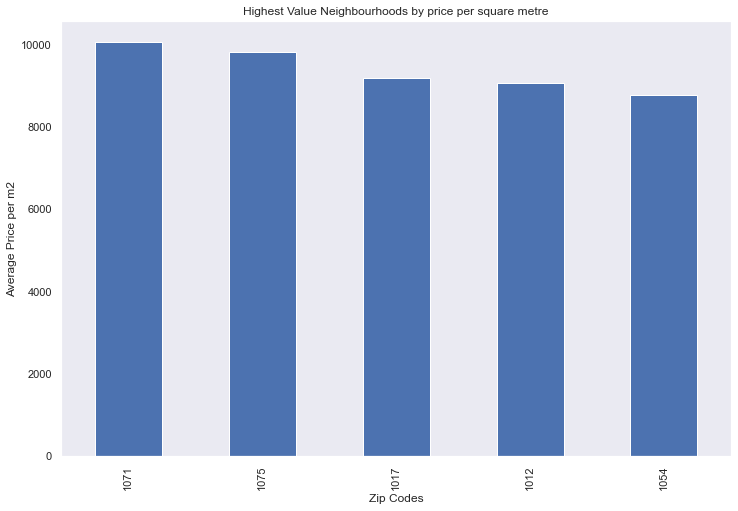

In [14]:
grouped_zip_codes.sort_values(ascending = False).head(5).plot.bar(figsize = (12,8))
plt.title("Highest Value Neighbourhoods by price per square metre") 
plt.xlabel("Zip Codes") 
plt.ylabel("Average Price per m2")

## In the next section, we will create our train test split and use the files to train our ML model

In [15]:
# Import the train test split functionality from sklearn and the polynomial model

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures

In [16]:
# We want to be able to calculate the price per metre squared against the zip code. 
#As the areas are already in metre squared we need to set a variable, X, to Price/Area. Inspiration from online examples. 

X = df[['Area']]
y = df[['Price']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42, shuffle = True)

### We want to use ML techniques such as RND Forest to see how each variable contributes towards the housing price

### First we shall create a linear regression model for the property price against the area. This is suitable as the data clearly appears to follow a linear model from initial viewing

In [17]:
lin_reg = linear_model.LinearRegression()
lin_reg.fit(X_train, y_train)

LinearRegression()

In [18]:
linear_prediction = lin_reg.predict(X_test)

Text(0, 0.5, 'Price')

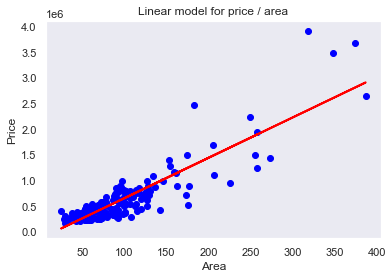

In [19]:
plt.scatter(X_test, y_test, color = "blue")
plt.plot(X_test, linear_prediction, color="red", linewidth = 2)
plt.title("Linear model for price / area") 
plt.xlabel("Area") 
plt.ylabel("Price")

# Clustering coordinates using the Kmeans algorithm
## ...
#### The purpose of this section is to identify similar areas on the coordinates plot and assign a clustering ID to each of the properties in the database. This will enable use to assess whether geographic location has an influence on housing price.

In [20]:
from sklearn.cluster import KMeans

In [21]:
X=df.loc[:,['Unnamed: 0','Lon','Lat']]
X.head(10)

,Unnamed: 0,Lon,Lat
0,1,4.907736,52.356157
1,2,4.850476,52.348586
2,3,4.944774,52.343782
3,4,4.789928,52.343712
4,5,4.902503,52.410538
5,6,4.875024,52.382228
6,7,4.896536,52.410585
7,8,4.871555,52.371041
8,9,4.854671,52.363471
9,10,4.897142,52.353111


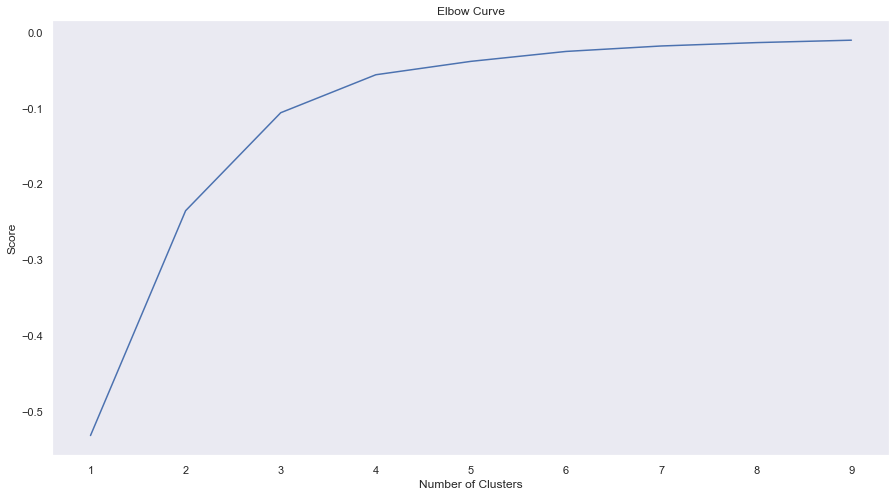

In [22]:
K_clusters = range(1,10)
kmeans = [KMeans(n_clusters=i) for i in K_clusters]
Y_axis = df[['Lat']]
X_axis = df[['Lon']]
score = [kmeans[i].fit(Y_axis).score(Y_axis) for i in range(len(kmeans))]

# Visualize
plt.plot(K_clusters, score)
plt.gcf().set_size_inches(15, 8)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()

In [23]:
kmeans = KMeans(n_clusters = 4, init ='k-means++')
kmeans.fit(X[X.columns[1:3]]) # Compute k-means clustering.

X['cluster_label'] = kmeans.fit_predict(X[X.columns[1:3]])

centers = kmeans.cluster_centers_ # Coordinates of cluster centers.

labels = kmeans.predict(X[X.columns[1:3]]) # Labels of each point
X.head(10)

,Unnamed: 0,Lon,Lat,cluster_label
0,1,4.907736,52.356157,2
1,2,4.850476,52.348586,1
2,3,4.944774,52.343782,3
3,4,4.789928,52.343712,0
4,5,4.902503,52.410538,2
5,6,4.875024,52.382228,1
6,7,4.896536,52.410585,2
7,8,4.871555,52.371041,1
8,9,4.854671,52.363471,1
9,10,4.897142,52.353111,1


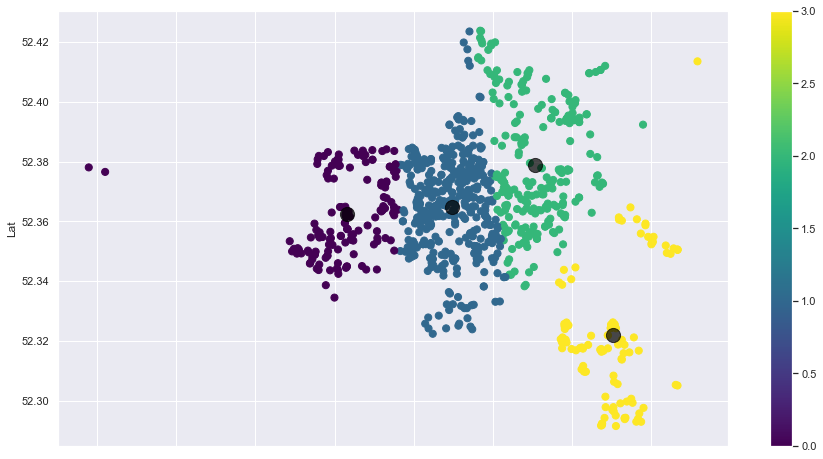

In [24]:
# Plot the scatter kmeans plot of the coordinates.
# The key to the right of the graph denotes which cluster corresponds with each colour. 

X.plot.scatter(x = 'Lon', y = 'Lat', c = labels, s = 50, cmap = 'viridis', figsize = (15, 8))
plt.scatter(centers[:, 0], centers[:, 1], c ='black', s = 200, alpha = 0.7)
plt.grid()

### Adding the new cluster_labels to the original dataframe

In [25]:
X = X[['Unnamed: 0', 'cluster_label']]

In [26]:
clustered_data = df.merge(X, left_on='Unnamed: 0', right_on='Unnamed: 0')
clustered_data.rename(columns={'cluster_label': 'cluster_ID'}, inplace=True)

In [27]:
# Show that the two dataframes have been merged together
clustered_data.head(5)

,Unnamed: 0,Address,Zip,Price,Area,Room,Lon,Lat,Price_per_m2,cluster_ID
0,1,"Blasiusstraat 8 2, Amsterdam",1091,685000.0,64,3,4.907736,52.356157,10703.125000,2
1,2,"Kromme Leimuidenstraat 13 H, Amsterdam",1059,475000.0,60,3,4.850476,52.348586,7916.666667,1
2,3,"Zaaiersweg 11 A, Amsterdam",1097,850000.0,109,4,4.944774,52.343782,7798.165138,3
3,4,"Tenerifestraat 40, Amsterdam",1060,580000.0,128,6,4.789928,52.343712,4531.250000,0
4,5,"Winterjanpad 21, Amsterdam",1036,720000.0,138,5,4.902503,52.410538,5217.391304,2


## Plot a polynomial graph for each of the four clusters for price / area 
### Try to apply ridge regression to the model

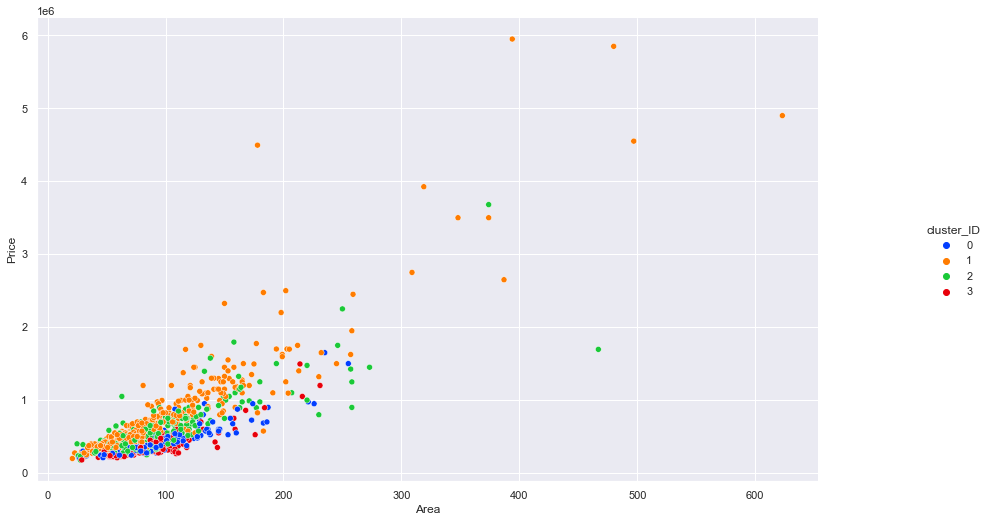

In [28]:
# Here we plot a similar graph to the one featured towards the top of the script, except this time the cluster_ID found from the K means process is included as the Hue

sns.relplot(x = "Area", y = "Price", hue = "cluster_ID", data = clustered_data, palette = "bright")
plt.gcf().set_size_inches(15, 8)
plt.grid()


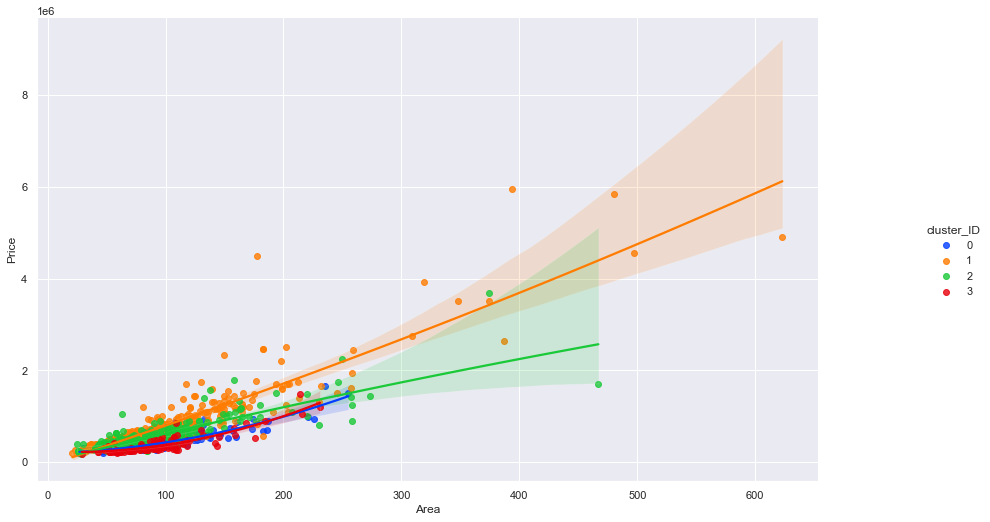

In [33]:
# This uses the polynomial regression fuction built into seaborn to plot the regression for each of the different clusters.
# The disadvantage of using this method is that the prediction stops at the final datapoint for each category.

sns.lmplot(x ='Area', y ='Price', data = clustered_data, hue ='cluster_ID', palette = "bright", order = 2)
plt.gcf().set_size_inches(15, 8)
plt.grid()